# How do you work through a predictive modeling machine learning problem end-to-end?

In this case study, we will work through a regression predictive modeling problem in Python including each step of the machine learning process. After completing this project, we will know:

1. How to work through a regression predictive modeling problem end-to-end
2. How to use data transforms to improve model performance
3. How to use algorithm tuning to improve model performance
4. How to use ensemble methods and tuning of ensemble methods to improve model performance

## Machine Learning Project Template
#### 1. Prepare Problem
###### 1.1. Load libraries
###### 1.2. Load dataset

##### 2. Summarize Data
###### 2.1. Descriptive statistics
###### 2.2. Data visualizations

##### 3. Prepare Data
###### 3.1. Data Cleaning
###### 3.2. Feature Selection
###### 3.3. Data Transforms

##### 4. Evaluate Algorithms
###### 4.1. Split-out validation dataset
###### 4.2. Test options and test metric
###### 4.3. Spot Check Algorithms
###### 4.4. Compare Algorithms

##### 5. Improve Accuracy
###### 5.1. Algorithm Tuning
###### 5.2. Ensembles

##### 6. Finalize Model
###### 6.1. Predictions on validation dataset
###### 6.2. Create standalone model on entire training dataset
###### 6.3. Save model for later use

# Problem Definition

For this case study, we will investigate the Boston House Price dataset. 

Each record in the database describes a Boston suburb or town. 

The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. 

The attributes are defined as follows (taken from the UCI Machine Learning Repository1):

1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000 US Dollars
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk - 0:63)^2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population
14. MEDV: Median value of owner-occupied homes in 1000s of US Dollars

We can see that the input attributes have a mixture of units.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
# Load dataset
import os
os.chdir('C:\Siddhartha\Personal Documents\BOK\AIML\Featurization, Model Selection')
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.csv', delim_whitespace=True, names=names)

We can see that we are specifying the short names for each attribute so that we can reference them clearly later. 

We can also see that attributes are delimited by whitespace rather than commas in this file and we indicate this to read_csv() function via the delim whitespace argument. 

We now have our data loaded.

# Analyze Data

We can now take a closer look at our loaded data

## Descriptive Statistics

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


We can see that all of the attributes are numeric, mostly real values (float) and some have been interpreted as integers (int).

Let's now take a peek at the first 5 rows of the data

In [5]:
# head
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


We can confirm that the scales for the attributes are all over the place because of the differing units. We may benefit from some transforms later on.

Let's summarize the distribution of each attribute.

In [6]:
# descriptions
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

We now have a better feeling for how different the attributes are. 

The min and max values and also the means vary a lot. 

We are likely going to get better results by rescaling the data in some way.

###  Let's now take a look at the correlation between all of the numeric attributes.

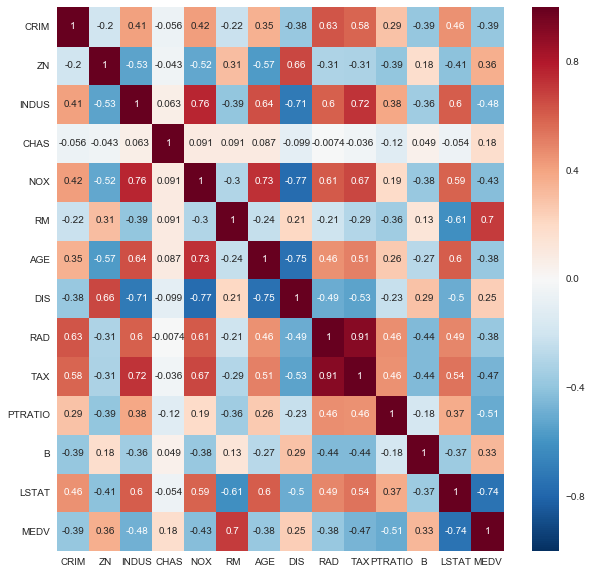

In [7]:
corrmat = data.corr()
pyplot.subplots(figsize = (10,10))
sn.heatmap(corrmat, annot=True)

This is interesting. We can see that many of the attributes have a strong correlation:
Example: > 0:70 or < - 0:70 

For example:

1. NOX and INDUS with 0.77
2. DIS and INDUS with -0.71
3. TAX and INDUS with 0.72
4. AGE and NOX with 0.73
5. DIS and NOX with -0.78

It also looks like LSTAT has a good negative correlation with the output variable MEDV with a value of -0.74

# Data Visualizations

Look at the data with box and whisker plots of each attribute.

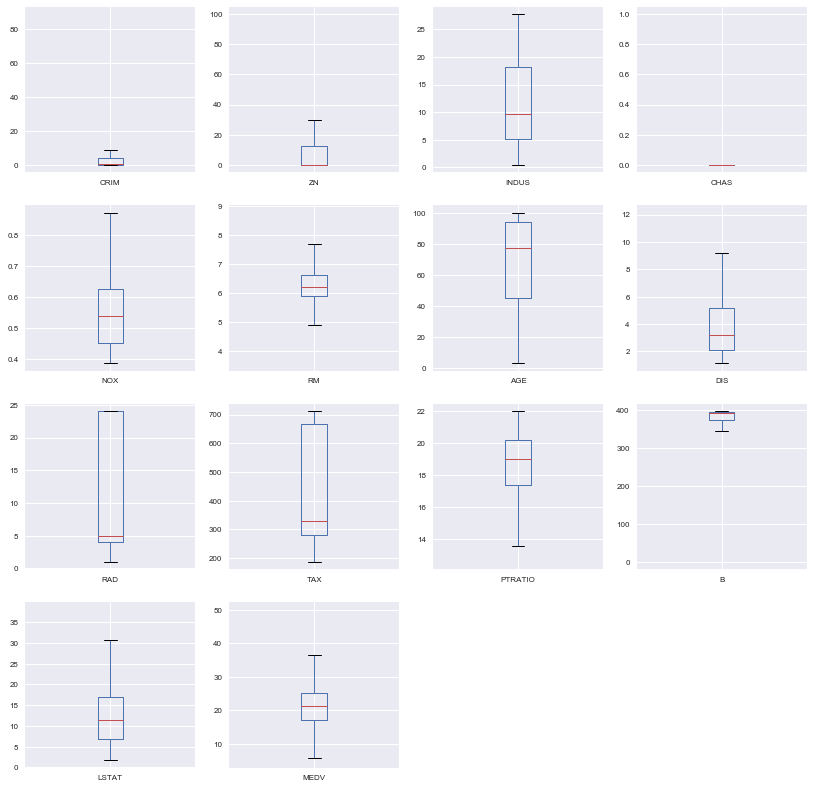

In [8]:
# box and whisker plots
data.plot(kind='box', subplots=True, layout=(4,4), fontsize=8, figsize=(14,14))
pyplot.show()

This helps point out the skew in many distributions so much so that data looks like outliers (e.g. beyond the whisker of the plots).

# Summary of Ideas

There is a lot of structure in this dataset. We need to think about transforms that we could use later to better expose the structure which in turn may improve modeling accuracy. So far it would be worth trying:

1. Feature selection and removing the most correlated attributes.
2. Normalizing the dataset to reduce the effect of differing scales.
3. Standardizing the dataset to reduce the effects of differing distributions.

We would also explore the possibility of binning (discretization) of the data. This can often improve accuracy for decision tree algorithms.

# Validation Dataset

We will use 80% of the dataset for modeling and hold back 20% for validation.

In [9]:
# Split-out validation dataset
X = data.drop('MEDV', axis=1)
Y = data[['MEDV']]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Evaluate Algorithms: Baseline

We have no idea what algorithms will do well on this problem. 

Gut feel suggests regression algorithms like Linear Regression may do well. 

It is also possible that decision trees also may do well. 

We have no idea. Let's design our test process. 

We will use 10-fold cross-validation. 

The dataset is not too small and this is a good standard test harness configuration. 

We will evaluate algorithms using the Mean Squared Error (MSE) metric. 

MSE will give a gross idea of how wrong all predictions are (0 is perfect).

In [10]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'mean_squared_error'

Let's create a baseline of performance on this problem and spot-check a number of different algorithms. We will select a suite of different algorithms capable of working on this regression problem. The three algorithms selected include:
1. Linear Algorithms: Linear Regression (LR)
2. Nonlinear Algorithms: Classiffication and Regression Trees (CART) and k-Nearest Neighbors (KNN).

In [11]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))

The algorithms all use default tuning parameters. 

Let's compare the algorithms. 

We will display the mean and standard deviation of MSE for each algorithm as we calculate it and collect the results to use later.

In [12]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, -cv_results.mean(), cv_results.std())
    print(msg)

LR: 21.379856 (9.414264)
KNN: 41.896488 (13.901688)
CART: 22.768572 (9.276030)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-pa

It looks like LR has the lowest MSE, followed closely by CART.

In [13]:
results

[array([ -9.79242784, -27.98675963, -39.57310026, -21.6483667 ,
        -19.30062302, -32.4894046 , -20.57890816,  -9.75795741,
        -21.94582648, -10.72518316]),
 array([-37.58885854, -25.08201951, -49.22080976, -65.8169561 ,
        -66.31606   , -40.57911   , -36.847     , -36.26257   ,
        -37.55772   , -23.69378   ]),
 array([-14.61609756, -13.11414634, -28.3997561 , -38.35121951,
        -26.96725   , -16.522     , -19.48375   ,  -8.76775   ,
        -34.972     , -26.49175   ])]

We can see similar distributions for the regression algorithms and perhaps a tighter distribution of scores for CART.

The differing scales of the data is probably hurting the skill of all of the algorithms and perhaps more so for KNN. Later we will look at running the same algorithms using a standardized copy of the data.

# Evaluate Algorithms: Standardization

We suspect that the differing scales of the raw data may be negatively impacting the skill of some of the algorithms. 

Let's evaluate the same algorithms with a standardized copy of the dataset. 

This is where the data is transformed such that each attribute has a mean value of zero and a standard deviation of 1. 

We also need to avoid data leakage when we transform the data. 

A good way to avoid leakage is to use pipelines that standardize the data and build the model for each fold in the cross-validation test harness. 

That way we can get a fair estimation of how each model with standardized data might perform on unseen data.

In [14]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])))

In [15]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train)
scaler.mean_

array([3.40301918e+00, 1.13886139e+01, 1.10690099e+01, 6.93069307e-02,
       5.51701980e-01, 6.27081683e+00, 6.83544554e+01, 3.81904455e+00,
       9.09158416e+00, 4.01945545e+02, 1.83868812e+01, 3.59049653e+02,
       1.27629455e+01])

In [16]:
X_train.mean(axis=0)

CRIM         3.403019
ZN          11.388614
INDUS       11.069010
CHAS         0.069307
NOX          0.551702
RM           6.270817
AGE         68.354455
DIS          3.819045
RAD          9.091584
TAX        401.945545
PTRATIO     18.386881
B          359.049653
LSTAT       12.762946
dtype: float64

In [17]:
scaler.scale_

array([8.20350944e+00, 2.33764653e+01, 6.99706013e+00, 2.53975353e-01,
       1.15408643e-01, 7.06206191e-01, 2.82856523e+01, 2.13121584e+00,
       8.49717649e+00, 1.66162815e+02, 2.16696648e+00, 8.70634273e+01,
       7.26789972e+00])

In [18]:
X_train.std(axis=0)

CRIM         8.213681
ZN          23.405450
INDUS        7.005736
CHAS         0.254290
NOX          0.115552
RM           0.707082
AGE         28.320724
DIS          2.133858
RAD          8.507712
TAX        166.368845
PTRATIO      2.169653
B           87.171380
LSTAT        7.276911
dtype: float64

In [19]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, -cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 21.379856 (9.414264)
ScaledKNN: 20.107620 (12.376949)
ScaledCART: 23.887588 (8.599271)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-pa

Running the example provides a list of mean squared errors. We can see that scaling did have an effect on KNN, driving the error lower than the other models.

We can see that KNN has both a tight distribution of error and has the lowest score.

# Improve Results With Tuning

We know from the results that KNN achieves good results on a scaled version of the dataset. 

## But can it do better?

The default value for the number of neighbors in KNN is 5. 

We can use a grid search to try a set of different numbers of neighbors and see if we can improve the score. 

The below example tries odd k values from 1 to 21, an arbitrary range covering a known good value of 5. 

Each k value (n neighbors) is evaluated using 10-fold cross-validation on a standardized copy of the 'training dataset'.

In [20]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
scaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(scaledX, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-pa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-pa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-pa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-pa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-pa

We can display the mean and standard deviation scores as well as the best performing value for k below.

In [21]:
print("Best: %f using %s" % (-grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (-mean, stdev, param))

Best: 18.172137 using {'n_neighbors': 3}
20.208663 (15.029652) with: {'n_neighbors': 1}
18.172137 (12.950570) with: {'n_neighbors': 3}
20.131163 (12.203697) with: {'n_neighbors': 5}
20.575845 (12.345886) with: {'n_neighbors': 7}
20.368264 (11.621738) with: {'n_neighbors': 9}
21.009204 (11.610012) with: {'n_neighbors': 11}
21.151809 (11.943318) with: {'n_neighbors': 13}
21.557400 (11.536339) with: {'n_neighbors': 15}
22.789938 (11.566861) with: {'n_neighbors': 17}
23.871873 (11.340389) with: {'n_neighbors': 19}
24.361362 (11.914786) with: {'n_neighbors': 21}


# We can see that the best for k (n neighbors) is 3 providing a mean squared error of 18.172137, the best so far.

# Exercises

Tune Decision Tree Algorithm

Tune Linear Regression Algorithm

# Ensemble Methods

Another way that we can improve the performance of algorithms on this problem is by using ensemble methods. 

We will evaluate two different ensemble machine learning algorithms, one boosting and one bagging method:

1. Boosting Methods: AdaBoost (AB)
2. Bagging Methods: Random Forests (RF)

We will use the same test harness as before, 10-fold cross-validation and pipelines that standardize the training data for each fold.

In [22]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))

In [23]:
results = []
names = []
for name, model in ensembles: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, -cv_results.mean(), cv_results.std())
    print(msg)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-pa

ScaledAB: 15.121798 (7.531730)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-pa

ScaledRF: 12.835641 (5.853781)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


# Running the example calculates the mean squared error for each method using the default parameters. 

# We can see that we're generally getting better scores than our earlier linear and nonlinear algorithms.

# It looks like RF has a better mean score

We can probably do better, given that the ensemble techniques used the default parameters.

Now we will look at tuning the RF to further lift the performance.

# Tune Ensemble Methods

In [24]:
# Parameters for RF
param_grid = dict(n_estimators=numpy.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100]))

The default number of estimaters is 10. 

This is a good candidate parameter of RF to tune. 

Often, the larger the number of estimators, the better the performance but the longer the training time. 

Now we will look at tuning the number of estimators for RF. 

Below we define a parameter grid n-estimators values from 10 to 100 in increments of 10. 

Each setting is evaluated using 10-fold cross-validation.

In [25]:
# Tune scaled Random Forest
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-pa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-pa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-pa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-pa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-pa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-pa

In [26]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params): 
    print("%f (%f) with: %r" % (-mean, stdev, param))

Best: -12.075728 using {'n_estimators': 40}
13.844806 (7.482487) with: {'n_estimators': 10}
13.047166 (7.138202) with: {'n_estimators': 20}
12.329725 (6.692102) with: {'n_estimators': 30}
12.075728 (6.318779) with: {'n_estimators': 40}
12.233028 (6.272580) with: {'n_estimators': 50}
12.357486 (6.286516) with: {'n_estimators': 60}
12.507801 (6.362861) with: {'n_estimators': 70}
12.552741 (6.494378) with: {'n_estimators': 80}
12.457543 (6.492264) with: {'n_estimators': 90}
12.463770 (6.492863) with: {'n_estimators': 100}


# Exercise

# Different hyperparameters in Random Forest

# Tune AdaBoost Algorithm

We can see that the best configuration was n estimators=40 resulting in a mean squared error of 12.075728 whereas untuned method gave mean square error as 12.84.

# Next we can finalize the model and prepare it for general use.

# Finalize Model

In this section we will finalize the RF model and evaluate it on our hold out validation dataset. 

First we need to prepare the model and train it on the entire training dataset.

This includes standardizing the training dataset before training.

In [27]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestRegressor(random_state=seed, n_estimators=40)
model.fit(rescaledX, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=40, n_jobs=1, oob_score=False, random_state=7,
           verbose=0, warm_start=False)

We can then scale the inputs for the validation dataset and generate predictions.

In [28]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

16.64629001225489


We can see that the estimated mean squared error is 16.65, close to our estimate of 12.07.

# Deliver the solution to customer

In [29]:
import pickle

In [30]:
file_Name = "BostonHousePricePredictionSolution"
# open the file for writing
fileObject = open(file_Name,'wb') 

In [31]:
# this writes the object model to the file named 'BostonHousePricePredictionSolution'
pickle.dump(model,fileObject)   

In [32]:
# Close the fileObject
fileObject.close()

In [33]:
# we open the file for reading
fileObject = open('BostonHousePricePredictionSolution','rb')  
# load the object from the file into var b
reloadedModel = pickle.load(fileObject)  

In [34]:
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

16.64629001225489


In [35]:
newDataPoint = pd.DataFrame({'CRIM':[3.8497], 'ZN':[0.0], 'INDUS':[18.1], 'CHAS':[1], 'NOX':[0.77], 'RM':[6.395], 
                            'AGE':[1.0], 'DIS':[2.5052], 'RAD':[24], 'TAX':[666.0], 'PTRATIO':[20.2],'B':[391.34], 
                            'LSTAT':[13.27]})

In [36]:
reloadedModel.predict(newDataPoint)

array([33.4075])

# What is missing here? Any mistakes? 

In [37]:
file_Name1 = "scalers"
# open the file for writing
fileObject1 = open(file_Name1,'wb') 
# this writes the object model to the file named 'BostonHousePricePredictionSolution'
pickle.dump(scaler,fileObject1)   
# Close the fileObject
fileObject1.close()
# we open the file for reading
fileObject1 = open('scalers','rb')  
# load the object from the file into var b
reloadedScalers = pickle.load(fileObject1)  

In [38]:
scaledNewDataPoint = reloadedScalers.transform(newDataPoint)
reloadedModel.predict(scaledNewDataPoint)

array([47.59])

# Summary

In this case study, we worked through a regression predictive modeling machine learning problem from end-to-end using Python. Specifically, the steps covered were:

1. Problem Definition (Boston house price data)
2. Loading the Dataset
3. Analyze Data (some skewed distributions and correlated attributes)
4. Evaluate Algorithms (Linear Regression looked good)
5. Evaluate Algorithms with Standardization (KNN looked good)
6. Algorithm Tuning (K=3 for KNN was best)
7. Ensemble Methods (Bagging and Boosting, Random Forest looked good)
8. Tuning Ensemble Methods (getting the most from Random Forest)
9. Finalize Model (use all training data and confirm using validation dataset).

Working through this case study showed us how the recipes for specific machine learning tasks can be pulled together into a complete project. 

Working through this case study is good practice at applied machine learning using Python and scikit-learn.